In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import radar
import healpy as hp


In [2]:
# Load up the analysis of the different simulations
df = pd.read_hdf('simulation_dbs/summary.h5')

In [3]:
# Ugh, I was dumb. Let's try to sort by satellite basis function weight

weight = [float(rn.replace('satellite_sim_', '').split('_')[0]) for rn in df.index]

In [4]:
order = np.argsort(weight)
df = df.iloc[order]

In [5]:
df

metric,Length of Survey (days),"NChanges filter, observationStartMJD",OpenShutterFraction,tEff,Number of Exposures,Sum SkySaturation,Slew Count All visits,Mean slewTime All visits,Median slewTime All visits,Min slewTime All visits,...,3x2ptFoM ExgalM5_with_cuts i band non-DD year 9 HealpixSlicer,3x2ptFoM_simple ExgalM5_with_cuts i band non-DD year 9 HealpixSlicer,Mean ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,Median ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,Rms ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,3x2ptFoM ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,3x2ptFoM_simple ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,Median SurfaceBrightLimit i HealpixSlicer,Sum NgalScale i HealpixSlicer
run_name,,,,,,,,,,,,,,,,,,,,,
satellite_sim_0.0_onew_v2.2_1yrs,364.998172,3374.0,0.716841,0.720839,214014.0,0.0,214014.0,7.902378,4.890227,2.0,...,-1.637500e+30,-1.637500e+30,25.445092,25.435515,0.036600,876.222566,24.122786,-666.0,28.565033,1.409425e+07
satellite_sim_0.0_slv1_v2.2_1yrs,364.998172,3374.0,0.716841,0.720839,214014.0,0.0,214014.0,7.902378,4.890227,2.0,...,-1.637500e+30,-1.637500e+30,25.445092,25.435515,0.036600,876.222566,24.122786,-666.0,28.565033,1.409425e+07
satellite_sim_0.0_slv2_v2.2_1yrs,364.998172,3374.0,0.716841,0.720839,214014.0,0.0,214014.0,7.902378,4.890227,2.0,...,-1.637500e+30,-1.637500e+30,25.445092,25.435515,0.036600,876.222566,24.122786,-666.0,28.565033,1.409425e+07
satellite_sim_0.1_onew_v2.2_1yrs,364.998009,3384.0,0.716808,0.719362,214035.0,0.0,214035.0,7.897877,4.891482,2.0,...,-1.637500e+30,-1.637500e+30,25.454056,25.443157,0.044831,815.793423,24.145443,-666.0,28.573982,1.397698e+07
satellite_sim_0.1_slv1_v2.2_1yrs,364.998198,3390.0,0.716865,0.719733,214086.0,0.0,214086.0,7.898024,4.890839,2.0,...,-1.637500e+30,-1.637500e+30,25.455705,25.447249,0.042689,1170.814635,24.090104,-666.0,28.575860,1.413346e+07
satellite_sim_0.1_slv2_v2.2_1yrs,364.998095,3399.0,0.717148,0.717716,214146.0,0.0,214146.0,7.880273,4.888636,2.0,...,-1.637500e+30,-1.637500e+30,25.444550,25.434624,0.037525,703.328075,24.150973,-666.0,28.570983,1.399130e+07
satellite_sim_1.0_slv1_v2.2_1yrs,364.997929,3352.0,0.717218,0.720190,214203.0,0.0,214203.0,7.878771,4.895048,2.0,...,-1.637500e+30,-1.637500e+30,25.448768,25.440391,0.038652,828.382828,24.138899,-666.0,28.574194,1.405381e+07
satellite_sim_1.0_slv2_v2.2_1yrs,364.998075,3362.0,0.716855,0.723456,214041.0,0.0,214041.0,7.897200,4.897824,2.0,...,-1.637500e+30,-1.637500e+30,25.453393,25.443134,0.043276,769.632273,24.153099,-666.0,28.578708,1.433445e+07
satellite_sim_1.0_onew_v2.2_1yrs,364.997813,3348.0,0.716274,0.719743,213896.0,0.0,213896.0,7.931131,4.894397,2.0,...,-1.637500e+30,-1.637500e+30,25.454198,25.445268,0.043549,1028.134715,24.112333,-666.0,28.576064,1.388939e+07


In [6]:
# Now let's add some more columns based on the results we saved

dodge_weights = []
const_name = []
streak_length_sums = []
n_streak_sums = []
n_streaked_images = []
for sim_name in df.index:
# for sim_name in df.index[0:2]:
    dodge_weights.append(float(sim_name.split('_')[2]))
    const_name.append(sim_name.split('_')[3])
    _temp = np.load('/Users/apple/Desktop/'+sim_name+'.npz')['obs_array'].copy()
    
    streak_length_sums.append(np.sum(_temp['streak_len_deg']))
    n_streak_sums.append(np.sum(_temp['n_streaks']))
    n_streaked_images.append(np.size(np.where(_temp['n_streaks'] > 0)[0]))
    
    
df['dodge_weights'] = dodge_weights
df['constellation_name'] = const_name
df['streak_length_sum'] = streak_length_sums
df['n_streaks'] = n_streak_sums
df['n_streaked_images'] = n_streaked_images


Text(0.5, 0, 'Dodging Basis Function Weight (unitless)')

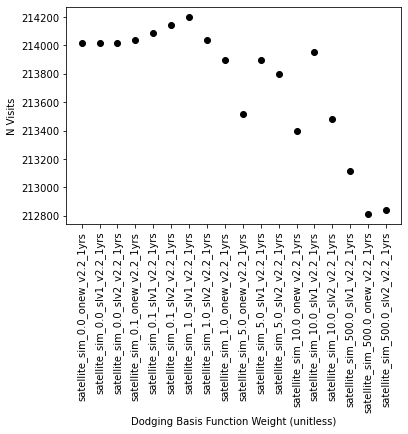

In [40]:

    
fig, ax = plt.subplots()

ax.plot(df['Number of Exposures'], 'ko')
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('N Visits')
ax.set_xlabel('Dodging Basis Function Weight (unitless)')

Text(0.5, 0, 'Dodging Basis Function Weight (unitless)')

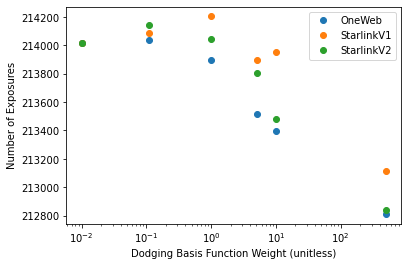

In [7]:
fig, ax = plt.subplots() 

for c_name in np.unique(df['constellation_name']):
    good = np.where(df['constellation_name'].values == c_name)
    # putting in a fudge factor of 1e-2 so a log-scale axis works well
    if c_name=='onew':
        clabel='OneWeb'
    elif c_name=='slv1':
        clabel='StarlinkV1'
    else: 
        clabel='StarlinkV2'
    ax.semilogx(df['dodge_weights'].values[good]+1e-2, df['Number of Exposures'].values[good], 'o', label=clabel)

legend = ax.legend()
ax.set_ylabel('Number of Exposures')
ax.set_xlabel('Dodging Basis Function Weight (unitless)')

Text(0, 0.5, 'Fraction of affected images')

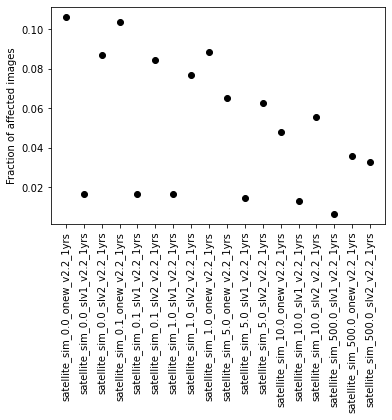

In [42]:
fig, ax = plt.subplots()

ax.plot(df['n_streaked_images']/df['Number of Exposures'], 'ko')
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Fraction of affected images')
# ax.set_xlabel('Dodging Basis Function Weight (unitless)')

Text(0.5, 0, 'Dodging Basis Function Weight (unitless)')

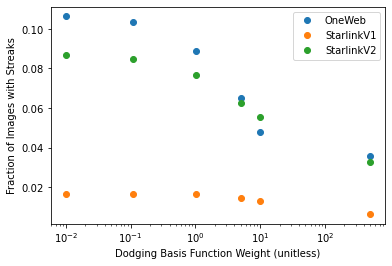

In [29]:
fig, ax = plt.subplots() 

for c_name in np.unique(df['constellation_name']):
    good = np.where(df['constellation_name'].values == c_name)
    # putting in a fudge factor of 1e-2 so a log-scale axis works well
    if c_name=='onew':
        clabel='OneWeb'
    elif c_name=='slv1':
        clabel='StarlinkV1'
    else: 
        clabel='StarlinkV2'
    ax.semilogx(df['dodge_weights'].values[good]+1e-2, (df['n_streaked_images']/df['Number of Exposures']).values[good], 'o', label=clabel)

legend = ax.legend()
ax.set_ylabel('Fraction of Images with Streaks')
ax.set_xlabel('Dodging Basis Function Weight (unitless)')

Text(0.5, 0, 'Dodging Basis Function Weight (unitless)')

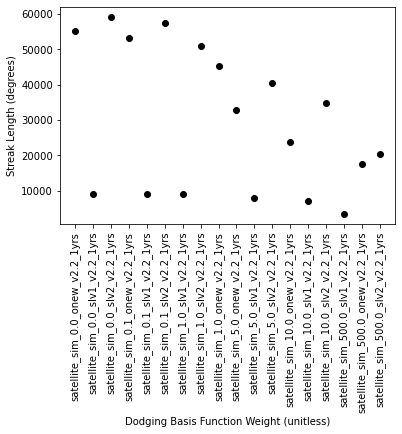

In [44]:
fig, ax = plt.subplots()

ax.plot(df['streak_length_sum'], 'ko')
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Streak Length (degrees)')
ax.set_xlabel('Dodging Basis Function Weight (unitless)')

Text(0.5, 0, 'Dodging Basis Function Weight (unitless)')

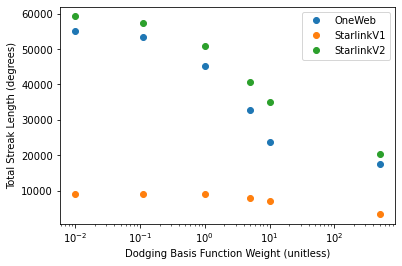

In [9]:
fig, ax = plt.subplots() 

for c_name in np.unique(df['constellation_name']):
    good = np.where(df['constellation_name'].values == c_name)
    # putting in a fudge factor of 1e-2 so a log-scale axis works well
    if c_name=='onew':
        clabel='OneWeb'
    elif c_name=='slv1':
        clabel='StarlinkV1'
    else: 
        clabel='StarlinkV2'
    ax.semilogx(df['dodge_weights'].values[good]+1e-2, df['streak_length_sum'].values[good], 'o', label=clabel)

legend = ax.legend()
ax.set_ylabel('Total Streak Length (degrees)')
ax.set_xlabel('Dodging Basis Function Weight (unitless)')

Text(0.5, 0, 'Dodging Basis Function Weight (unitless)')

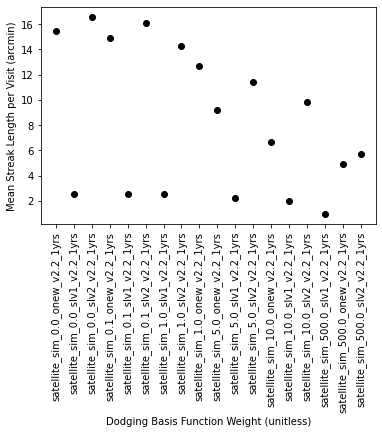

In [46]:
# Let's figure out the average streak length per image

fig, ax = plt.subplots()

ax.plot(df['streak_length_sum']/df['Number of Exposures']*60, 'ko')
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Mean Streak Length per Visit (arcmin)')
ax.set_xlabel('Dodging Basis Function Weight (unitless)')


Text(0.5, 0, 'Dodging Basis Function Weight (unitless)')

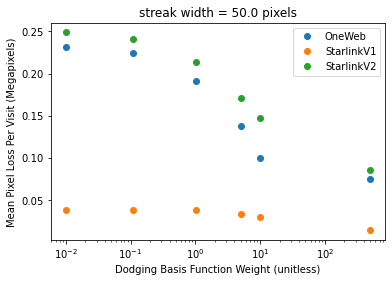

In [18]:
# add to title

streak_width=50  #estimate width of 50 pixels 

pixel_arc_ratio=5*3600 #Rubin's camera is 0.2 arcsec/pixel which converts to 5 pixel/arcsec *3600 arcsec/degree

fig, ax = plt.subplots()

#unit conversion: radians*(pixels/radian) gives streak length sum in pixels. 
mean_streak_length = df['streak_length_sum']/df['Number of Exposures']*pixel_arc_ratio*streak_width/1e6 


for c_name in np.unique(df['constellation_name']):
    good = np.where(df['constellation_name'].values == c_name)
    # putting in a fudge factor of 1e-2 so a log-scale axis works well
    if c_name=='onew':
        clabel='OneWeb'
    elif c_name=='slv1':
        clabel='StarlinkV1'
    else: 
        clabel='StarlinkV2'
    ax.semilogx(df['dodge_weights'].values[good]+1e-2, mean_streak_length.values[good], 'o', label=clabel)

#have better legend labels -look up legend documentation 
legend = ax.legend()
ax.set_title("streak width = %.1f pixels" %streak_width)
ax.set_ylabel('Mean Pixel Loss Per Visit (Megapixels)')
ax.set_xlabel('Dodging Basis Function Weight (unitless)')
#3.5 gigapixels



Text(0.5, 0, 'Dodging Basis Function Weight (unitless)')

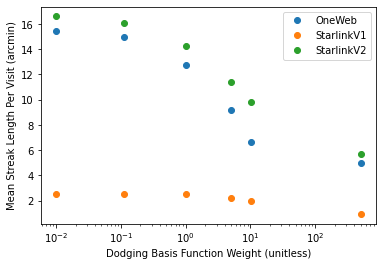

In [11]:
# Let's make some nicer plots
fig, ax = plt.subplots()

mean_streak_length = df['streak_length_sum']/df['Number of Exposures']*60  # in arcmin

for c_name in np.unique(df['constellation_name']):
    good = np.where(df['constellation_name'].values == c_name)
    # putting in a fudge factor of 1e-2 so a log-scale axis works well
    if c_name=='onew':
        clabel='OneWeb'
    elif c_name=='slv1':
        clabel='StarlinkV1'
    else: 
        clabel='StarlinkV2'
    ax.semilogx(df['dodge_weights'].values[good]+1e-2, mean_streak_length.values[good], 'o', label=clabel)
    # There's probably a better way to do this with pandas .loc or .iloc, but I refuse to learn it
    # when I can get away with simple np.where

legend = ax.legend()
ax.set_ylabel('Mean Streak Length Per Visit (arcmin)')
ax.set_xlabel('Dodging Basis Function Weight (unitless)')

Text(0, 0.5, '$\\Delta m$ (mags)')

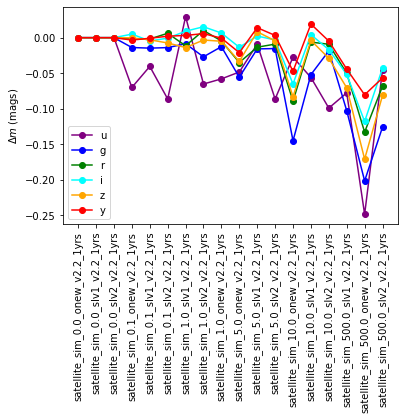

In [13]:
# Should break this into three plots, one for each constellation

fig, ax = plt.subplots()
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
           'i': 'cyan', 'z': 'orange', 'y': 'red'}

for filtername in 'ugrizy':
    zp = df['Median CoaddM5 %s HealpixSlicer' % filtername][0]
    ax.plot(df['Median CoaddM5 %s HealpixSlicer' % filtername] - zp, 
            color=f2c[filtername], marker='o', label=filtername )
    
ack = ax.tick_params('x',  rotation=90)
ax.legend()
ax.set_ylabel('$\Delta m$ (mags)')

Text(0.5, 1.0, 'OneWeb Constellation (6400 Sats)')

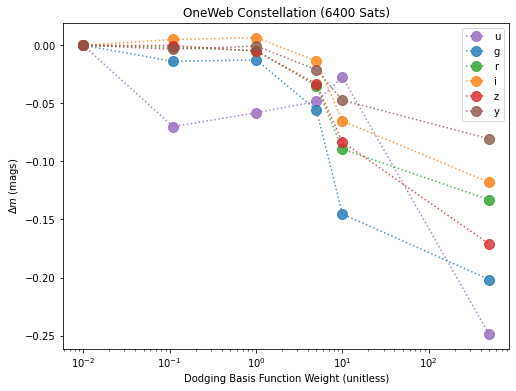

In [65]:
# The grand plot that we should have! (for each constellation), plot fraction of lost pixels on x-axis
# delta-m on the y-axis, color-coded by filter.
# Should break this into three plots, one for each constellation

#onew constellation
df2=df.loc[df['constellation_name']=='onew']
fig, ax = plt.subplots(figsize=(8,6))
f2c = {'u': 'C4', 'g': 'C0', 'r': 'C2',
           'i': 'C1', 'z': 'C3', 'y': 'C5'}

for filtername in 'ugrizy':
    zp = df2['Median CoaddM5 %s HealpixSlicer' % filtername][0]
    # ax.plot(df2['Median CoaddM5 %s HealpixSlicer' % filtername] - zp, 
    #         color=f2c[filtername], marker='o', label=filtername )
    ax.semilogx(df2['dodge_weights']+1e-2, df2['Median CoaddM5 %s HealpixSlicer' % filtername] - zp, 
            color=f2c[filtername], marker='o', label=filtername,  ls=':',ms=10,alpha=0.8)
    

ax.legend()
ax.set_xlabel('Dodging Basis Function Weight (unitless)')
ax.set_ylabel('$\Delta m$ (mags)')
ax.set_title('OneWeb Constellation (6400 Sats)')

In [ ]:
##add in delta m and pixel loss graph together 

Text(0.5, 1.0, 'Starlink V1 (4408 sats)')

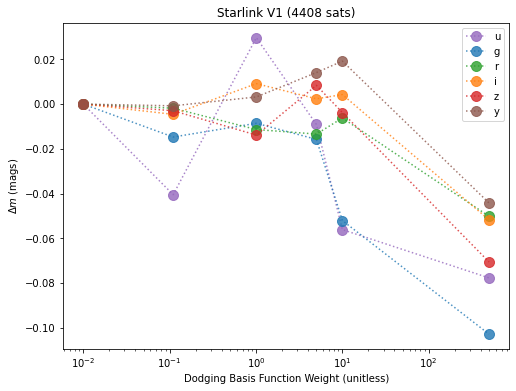

In [66]:

#slv1 constellation
df3=df.loc[df['constellation_name']=='slv1']
fig, ax = plt.subplots(figsize=(8,6))
f2c = {'u': 'C4', 'g': 'C0', 'r': 'C2',
           'i': 'C1', 'z': 'C3', 'y': 'C5'}


#how to make dashed line 
for filtername in 'ugrizy':
    zp = df3['Median CoaddM5 %s HealpixSlicer' % filtername][0]
    ax.semilogx(df3['dodge_weights']+1e-2, df3['Median CoaddM5 %s HealpixSlicer' % filtername] - zp, 
            color=f2c[filtername], marker='o', label=filtername, ls=':',ms=10,alpha=0.8)
    

ax.legend()
ax.set_xlabel('Dodging Basis Function Weight (unitless)')
ax.set_ylabel('$\Delta m$ (mags)')
ax.set_title('Starlink V1 (4408 sats)')

Text(0.5, 1.0, 'Starlink V2 (29988 sats)')

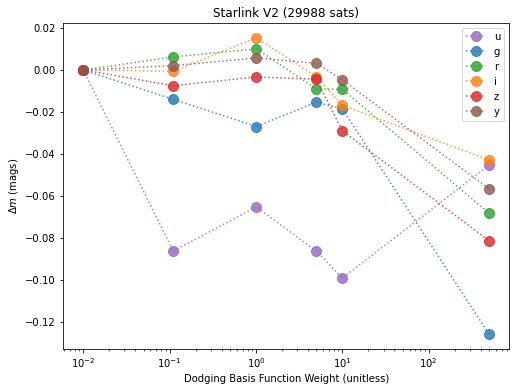

In [67]:
# slv2
df4=df.loc[df['constellation_name']=='slv2']
fig, ax = plt.subplots(figsize=(8,6))
f2c = {'u': 'C4', 'g': 'C0', 'r': 'C2',
           'i': 'C1', 'z': 'C3', 'y': 'C5'}

for filtername in 'ugrizy':
    zp = df4['Median CoaddM5 %s HealpixSlicer' % filtername][0]
    ax.semilogx(df4['dodge_weights']+1e-2, df4['Median CoaddM5 %s HealpixSlicer' % filtername] - zp, 
            color=f2c[filtername], marker='o', label=filtername, ls=':',ms=10,alpha=0.8 )
    

ax.legend()
ax.set_xlabel('Dodging Basis Function Weight (unitless)')
ax.set_ylabel('$\Delta m$ (mags)')
ax.set_title('Starlink V2 (29988 sats)')

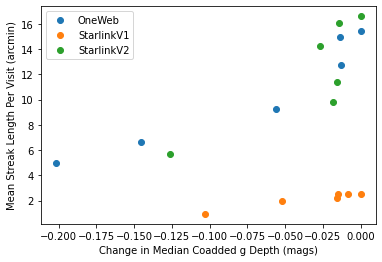

In [12]:
# A lot of info to try and plot here. We have 6 filters, 3 constellations, and 6 weights. 

filtername = 'g'
fig, ax = plt.subplots()
for c_name in np.unique(df['constellation_name']):
    good = np.where(df['constellation_name'].values == c_name)[0]

    zp = df['Median CoaddM5 %s HealpixSlicer' % filtername][0]
    dm = df['Median CoaddM5 %s HealpixSlicer' % filtername] - zp

    mean_streak_length = df['streak_length_sum']/df['Number of Exposures']*60  # in arcmin

    if c_name=='onew':
        clabel='OneWeb'
    elif c_name=='slv1':
        clabel='StarlinkV1'
    else: 
        clabel='StarlinkV2'

    ax.plot(dm.values[good], mean_streak_length[good], 'o', label=clabel )
ax.set_xlabel('Change in Median Coadded %s Depth (mags)' % filtername)
ax.set_ylabel('Mean Streak Length Per Visit (arcmin)')
legend = ax.legend()


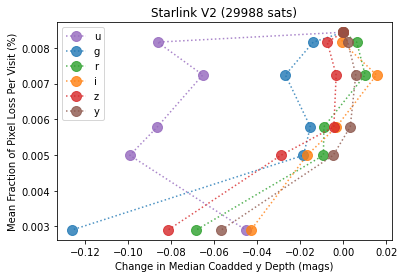

In [28]:

streak_width=50  #estimate width of 50 pixels 
pixel_arc_ratio=5*3600 #Rubin's camera is 0.2 arcsec/pixel which converts to 5 pixel/arcsec *3600 arcsec/degree

df4=df.loc[df['constellation_name']=='slv2']
fig, ax = plt.subplots()

f2c = {'u': 'C4', 'g': 'C0', 'r': 'C2',
           'i': 'C1', 'z': 'C3', 'y': 'C5'}
           
for filtername in 'ugrizy':
    zp = df4['Median CoaddM5 %s HealpixSlicer' % filtername][0]
    dm = df4['Median CoaddM5 %s HealpixSlicer' % filtername] - zp



    #unit conversion: radians*(pixels/radian) gives streak length sum in pixels. 
    mean_pixel = df4['streak_length_sum']/df4['Number of Exposures']*pixel_arc_ratio*streak_width
    mean_pixel_frac=mean_pixel*100/2.95e9

    ax.plot(dm, mean_pixel_frac, color=f2c[filtername], marker='o', label=filtername, ls=':',ms=10,alpha=0.8)

ax.set_xlabel('Change in Median Coadded %s Depth (mags)' % filtername)
ax.set_ylabel('Mean Fraction of Pixel Loss Per Visit (%)')
ax.set_title('Starlink V2 (29988 sats)')
legend = ax.legend()


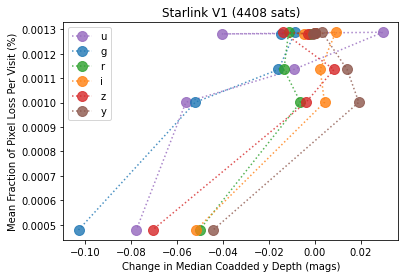

In [27]:
streak_width=50  #estimate width of 50 pixels 
pixel_arc_ratio=5*3600 #Rubin's camera is 0.2 arcsec/pixel which converts to 5 pixel/arcsec *3600 arcsec/degree

df4=df.loc[df['constellation_name']=='slv1']
fig, ax = plt.subplots()

f2c = {'u': 'C4', 'g': 'C0', 'r': 'C2',
           'i': 'C1', 'z': 'C3', 'y': 'C5'}
           
for filtername in 'ugrizy':
    zp = df4['Median CoaddM5 %s HealpixSlicer' % filtername][0]
    dm = df4['Median CoaddM5 %s HealpixSlicer' % filtername] - zp


    #unit conversion: radians*(pixels/radian) gives streak length sum in pixels. 
    mean_pixel = df4['streak_length_sum']/df4['Number of Exposures']*pixel_arc_ratio*streak_width
    mean_pixel_frac=mean_pixel*100/2.95e9
 

    ax.plot(dm, mean_pixel_frac, color=f2c[filtername], marker='o', label=filtername, ls=':',ms=10,alpha=0.8)

ax.set_xlabel('Change in Median Coadded %s Depth (mags)' % filtername)
ax.set_ylabel('Mean Fraction of Pixel Loss Per Visit (%)')
ax.set_title('Starlink V1 (4408 sats)')
legend = ax.legend()

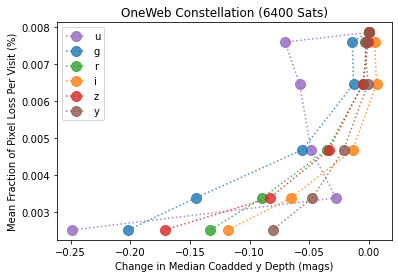

In [26]:
streak_width=50  #estimate width of 50 pixels 
pixel_arc_ratio=5*3600 #Rubin's camera is 0.2 arcsec/pixel which converts to 5 pixel/arcsec *3600 arcsec/degree

df4=df.loc[df['constellation_name']=='onew']
fig, ax = plt.subplots()

f2c = {'u': 'C4', 'g': 'C0', 'r': 'C2',
           'i': 'C1', 'z': 'C3', 'y': 'C5'}
           
for filtername in 'ugrizy':
    zp = df4['Median CoaddM5 %s HealpixSlicer' % filtername][0]
    dm = df4['Median CoaddM5 %s HealpixSlicer' % filtername] - zp


    #unit conversion: radians*(pixels/radian) gives streak length sum in pixels. 
    mean_pixel = df4['streak_length_sum']/df4['Number of Exposures']*pixel_arc_ratio*streak_width 
    mean_pixel_frac=mean_pixel*100/2.95e9 

    ax.plot(dm, mean_pixel_frac, color=f2c[filtername], marker='o', label=filtername, ls=':',ms=10,alpha=0.8)

ax.set_xlabel('Change in Median Coadded %s Depth (mags)' % filtername)
ax.set_ylabel('Mean Fraction of Pixel Loss Per Visit (%)')
ax.set_title('OneWeb Constellation (6400 Sats)')
legend = ax.legend()

#fraction of pixel loss per visit on y axis. mean pixel / 3.5 gigapixel
#helps evaluate the tradeoff 